In [47]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft,fftfreq,fftshift
import pywt


In [3]:
# 開啟 CSV 檔案
csvpath = 'data/ElNino_data.csv'
with open(csvpath , newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
  for row in rows:
    print(row)

['# Seasurface temp averaged over NINO3 region', ' format= 3F8.2 ']
['# # Datafrom UKMO GISST2.3 (1871-1996) and Reynolds SST (Jan 1997-)']
['Time', ' SST(degC)', ' Anomaly(degC monthly means of entire record removed) ']
['1871.04', '25.04', '-0.44']
['1871.12', '26.20', '-0.03']
['1871.21', '26.99', '0.04']
['1871.29', '27.33', '-0.02']
['1871.38', '26.38', '-0.49']
['1871.46', '25.90', '-0.41']
['1871.54', '25.09', '-0.25']
['1871.62', '24.59', '-0.19']
['1871.71', '24.66', '0.01']
['1871.79', '24.48', '-0.28']
['1871.88', '24.62', '-0.14']
['1871.96', '24.21', '-0.80']
['1872.04', '25.19', '-0.29']
['1872.12', '25.56', '-0.67']
['1872.21', '26.55', '-0.40']
['1872.29', '26.73', '-0.62']
['1872.38', '26.08', '-0.79']
['1872.46', '25.71', '-0.60']
['1872.54', '24.86', '-0.48']
['1872.62', '24.19', '-0.59']
['1872.71', '24.23', '-0.42']
['1872.79', '24.00', '-0.76']
['1872.88', '24.04', '-0.72']
['1872.96', '24.10', '-0.91']
['1873.04', '24.62', '-0.86']
['1873.12', '25.43', '-0.80']
[

['1952.46', '26.02', '-0.29']
['1952.54', '24.90', '-0.44']
['1952.62', '24.59', '-0.19']
['1952.71', '24.42', '-0.23']
['1952.79', '24.71', '-0.05']
['1952.88', '24.47', '-0.29']
['1952.96', '24.53', '-0.48']
['1953.04', '25.65', '0.17']
['1953.12', '26.81', '0.58']
['1953.21', '27.15', '0.20']
['1953.29', '27.80', '0.45']
['1953.38', '27.15', '0.28']
['1953.46', '26.89', '0.58']
['1953.54', '25.64', '0.30']
['1953.62', '24.90', '0.12']
['1953.71', '25.38', '0.73']
['1953.79', '24.86', '0.10']
['1953.88', '25.19', '0.43']
['1953.96', '25.20', '0.19']
['1954.04', '25.56', '0.08']
['1954.12', '25.95', '-0.28']
['1954.21', '26.78', '-0.17']
['1954.29', '26.24', '-1.11']
['1954.38', '26.07', '-0.80']
['1954.46', '25.53', '-0.78']
['1954.54', '24.62', '-0.72']
['1954.62', '24.04', '-0.74']
['1954.71', '23.84', '-0.81']
['1954.79', '24.08', '-0.68']
['1954.88', '24.08', '-0.68']
['1954.96', '24.24', '-0.77']
['1955.04', '25.03', '-0.45']
['1955.12', '26.08', '-0.15']
['1955.21', '26.44', '-

In [6]:
data = pd.read_csv(csvpath,skiprows=[0,1]) 
data.head()


,Time,SST(degC),Anomaly(degC monthly means of entire record removed)
0,1871.04,25.04,-0.44
1,1871.12,26.20,-0.03
2,1871.21,26.99,0.04
3,1871.29,27.33,-0.02
4,1871.38,26.38,-0.49


In [12]:
type(data)

pandas.core.frame.DataFrame

In [90]:
time = data.iloc[:,0].values.squeeze()
sig =  data.iloc[:,2].values.squeeze()


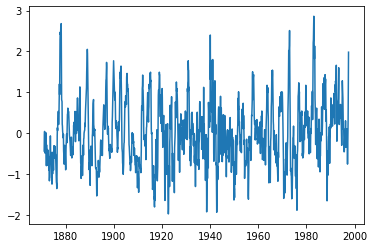

In [91]:
plt.plot(time,sig)

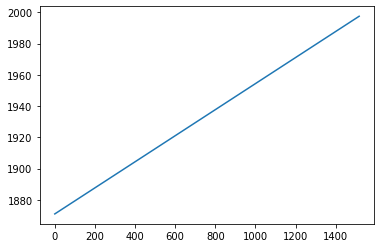

In [92]:
#觀察每次取樣是否相同間隔

plt.plot(time)

In [93]:
np.diff(time).mean()

0.08333553065260386

In [19]:
len(data)

1518

# Fourier Transform


In [112]:
#一個月一筆資料，代表一年採樣12個點
fs = 12
num_samples = len(data)


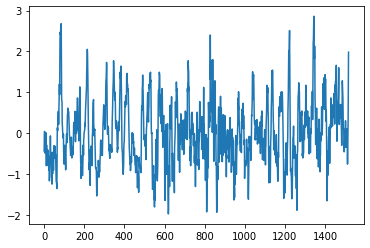

In [113]:
plt.plot(sig)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide


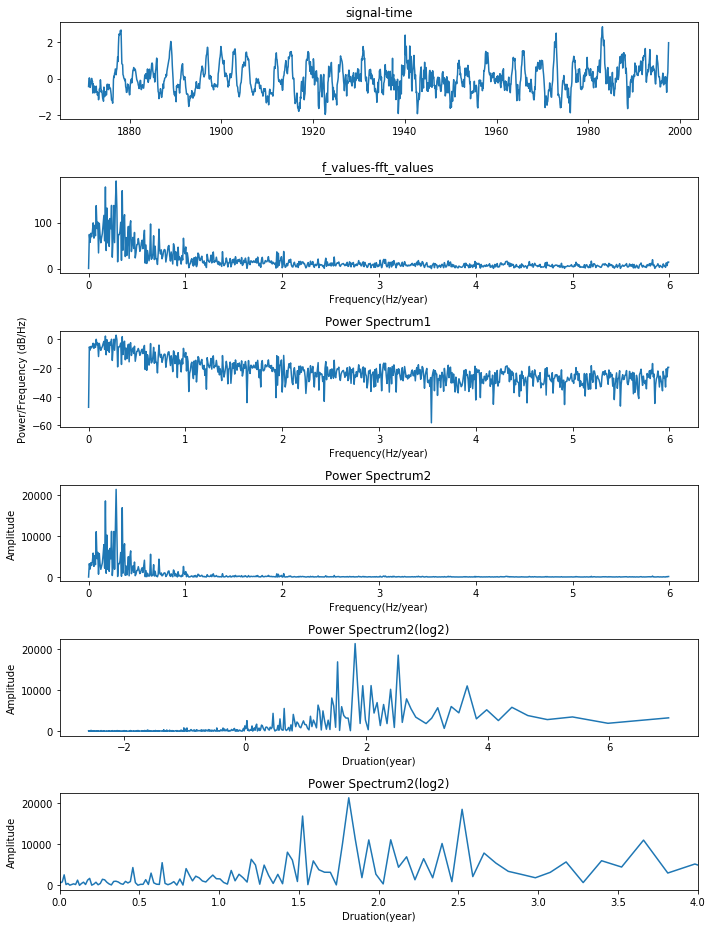

In [198]:
#繪圖

#進行頻譜分析
#fftfreq 第一個引數n是FFT的點數，一般取FFT之後的資料的長度（size）
#        第二個引數d是取樣週期，其倒數就是取樣頻率fs，即d=1/fs

#fftshift用來調整順序，讓資料平移以原點為中心
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)
#因計算出來的是對稱的，故只取一半顯示
f_values = f_values[ int(num_samples/2) :]
fft_values = fft_values[ int(num_samples/2) :]


'''
計算Power Spectrum Density
兩種算法
第一種是從matlab的資料
https://www.mathworks.com/help/signal/ug/power-spectral-density-estimates-using-fft.html

再用10*log10(fft_power1)算dB
算出來是Power/Frequency (dB/Hz)

第二種算法
是variance * magnitude
'''
fft_power1 = (1.0/(fs*num_samples)) * abs(fft_values) ** 2

variance = np.std(sig)**2
fft_power2 = variance * abs(fft_values) ** 2




#繪圖
fig, axes = plt.subplots(6, 1, figsize=(10,13))
axes[0].plot(time , sig)
axes[0].set_title('signal-time')

axes[1].plot(f_values , fft_values)
axes[1].set_title('f_values-fft_values')
axes[1].set_xlabel('Frequency(Hz/year)')

axes[2].plot(f_values , 10*np.log10(fft_power1))
axes[2].set_title('Power Spectrum1')
axes[2].set_xlabel('Frequency(Hz/year)')
axes[2].set_ylabel('Power/Frequency (dB/Hz)')

axes[3].plot(f_values , fft_power2)
axes[3].set_title('Power Spectrum2')
axes[3].set_xlabel('Frequency(Hz/year)')
axes[3].set_ylabel('Amplitude')

axes[4].plot(np.log2(1.0/f_values) , fft_power2)
axes[4].set_title('Power Spectrum2(log2)')
axes[4].set_xlabel('Druation(year)')
axes[4].set_ylabel('Amplitude')

axes[5].plot(np.log2(1.0/f_values) , fft_power2)
axes[5].set_title('Power Spectrum2(log2)')
axes[5].set_xlabel('Druation(year)')
axes[5].set_ylabel('Amplitude')
axes[5].set_xlim(0,4)

fig.tight_layout()

plt.show()


# 進行wavelet分析

In [179]:
#小波分析
wavename = 'cmor1.5-1.0'
scales = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(sig, scales, wavename, 1/fs)

power = (abs(cwtmatr)) ** 2
period = 1. / freqs    #週期是頻率的倒數

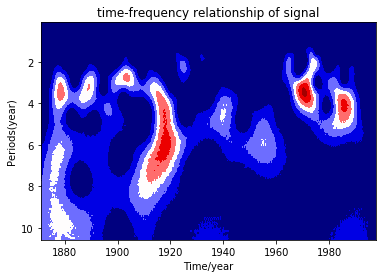

In [180]:
plt.contourf(time, period, power,cmap=plt.cm.seismic)
plt.title('time-frequency relationship of signal')
plt.xlabel('Time/year')
plt.ylabel('Periods(year)')
plt.gca().invert_yaxis()

plt.show()

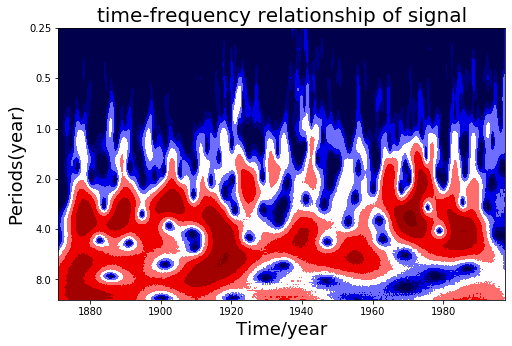

In [182]:
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)
title = 'time-frequency relationship of signal'
ylabel = 'Periods(year)'
xlabel = 'Time/year'

ax.set_title(title, fontsize=20)
ax.set_ylabel(ylabel, fontsize=18)
ax.set_xlabel(xlabel, fontsize=18)

yticks = 2**np.arange( np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())) )
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
ax.invert_yaxis()   
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -2)

plt.show()